# Modeling rainfall-runoff

## Rainfall-runoff models

For the runoff response of a river after rainfall, it is important to understand how quickly the rainfall on the land surface contributes to runoff. Various hydrological models exist for this purpose. In all models, hydrological processes are approximated using theoretical concepts. Sometimes, processes are greatly simplified or even neglected. This also indicates the conditions under which a hydrological model is applicable. Three models are discussed.

The first model, based on the storage principle, simulates the contribution of surface runoff to the total river discharge using the concept of a single outflowing reservoir. The inflow into this conceptual reservoir is the *effective precipitation* $P_a$ (NL: *afvoerbare neerslag*), as discussed in the previous chapter.

The second model, known as the rational method or time of concentration method, focuses on the duration of surface runoff from an impermeable area to the river as a central concept. Again, the effective precipitation $P_a$ is considered. The base flow contribution from groundwater to river discharge is not taken into account in these two models.

For larger catchments and/or when modeling the rainfall-runoff process over longer durations, it is usually important to consider the different processes involved. For this purpose, a conceptual storage model, also known as a conceptual bucket model, can be used to identify and represent the various occurring processes.

## The storage principle

### Principle

The runoff process involves elements of storage and transport. The storage principle establishes a relationship between the *storm runoff* $Q$  (also: *stormflow*; expressed per unit of area [L/T]) - consisting typically of overland flow and rapid subsurface flow (see {numref}`fluxes_and_storage`) - and the remaining available net precipitation $S$ that is temporarily stored somewhere in the catchment, without explicitly considering travel times. {numref}`fig:PaenQenS` shows the effective precipitation $P_a$ and the storm runoff $Q$. 

Below, the corresponding cumulative curves of storm runoff and effective precipitation intensity are plotted. At each time $t$, the storage $S$ [mm] present in the catchment is the difference between the two cumulative curves at that time.

```{figure} ../images/RFR_calculation_PaenQenS.png
---
height: 300px
name: fig:PaenQenS
---
Effective precipitation $P_a$ and storm runoff $Q$ plotted. Below this, the cumulative net precipitation that is temporarily stored somewhere in the catchment and the cumulative runoff are plotted, the difference being expressed as the storage $S$. {cite:p}`instropicsEVA` 
```

It is now assumed that the storm runoff $Q$ depends on the storage $S$ at the same time. This relationship between storage and runoff is usually represented by a formula also used for reservoirs:

$$
S=kQ^n \quad \text{[L$^3$]}
$$ (Storage_runoff)

The same formula is used per unit of area, but with depth as the unit instead of volume.

The simplest relationship is given by $n=1$ (a linear relationship), where the storage is proportional to the storm runoff. In this case, $k$ is a proportionality constant with the dimension of time and is also referred to as the *residence time* (NL: *verblijftijd*).

### Derivation and application

The magnitude of $k$ can be determined from observed storms and their corresponding runoff. The difficulty here is, of course, to determine the existing storage in the catchment. However, based on precipitation measurements, a reasonable estimate can often be made.

The derivation for an expression for $Q$ (per unit of area) that does not include storage is as follows:

**Runoff mechanism** 

$$ 
S=kQ \longrightarrow \frac{dS}{dt}=k\frac{dQ}{dt} \hspace{4cm} \text{[L/T]} 
$$ (runoff_mech)

**Continuity**

$$ 
dS=(P_a-Q)dt  \hspace{4.9cm} \text{[L]} 
$$ (continuity)

**Hence**: 

$$ 
k\frac{dQ}{dt}=P_a-Q \hspace{5.2cm} \text{[L/T]} 
$$ (hence)

This leads to the following **expression for $Q$**: 

$$
Q=P_a+(Q_0-P_a)e^{\frac{-t}{k}} \hspace{3.8cm} \text{[L/T]} 
$$ (Q_expression)


This formula is valid for each time interval in which $P_a$ is constant. Additionally, the calculated value for $Q$ at the end of an interval becomes $Q_0$ for the next interval, and so on (see also {numref}`ex_storage_method`). It can be observed that the runoff from $Q_0$ increases or decreases towards $P_a$. In theory, the runoff at the end of an infinitely long time interval would be equal to the effective precipitation intensity $P_a$ of that interval. For practical use, equal time steps $\Delta t$ are usually employed, assuming a linear runoff response within each step.

In that case, the following applies for the numerical solution:

**Runoff mechanism**

$$ 
S_1=kQ_1 \hspace{3.4cm} \text{[L]} 
$$ (runoff_mechanism)

$$
S_2=kQ_2  \hspace{3.6cm} \text{[L]}  
$$ (S2)

$$
S_2-S_1=k(Q_2-Q_1)  \hspace{3cm} \text{[L]} 
$$ (S2_S1)

**Continuity** 

$$ 
S_2=S_1+\bigg( P_a-\frac{1}{2}(Q_1+Q_2) \bigg) \Delta t \hspace{2.5cm} \text{[L]} 
$$ (S2_cont)

This leads to the following **expression for $Q_2$**:

$$ 
Q_2=\frac{k-\frac{1}{2}\Delta t}{k+\frac{1}{2}\Delta t}Q_1+\frac{\Delta t}{k+\frac{1}{2}\Delta t}P_a \hspace{2.8cm} \text{[L/T]}  
$$ (Q2_new)

Where:

| | | | |
| --- | --- | --- | --- |
| $k$ | Residence time (NL: Verblijftijd) | [T] |
| $S_1$ | Storage at the beginning of the interval | [L]  |
| $S_2$ | Storage at the end of the interval | [L] |
| $Q_1$ | Storm runoff at the beginning of the interval | [L/T] |
| $Q_2$ | Storm runoff at the end of the interval | [L/T] |

```{Note}
The sum of the coefficients for $Q_1$ and $P_a$ is equal to 1.
```

Equation {eq}`Q2_new` can be easily used to calculate the runoff at successive time steps; the calculated $Q_2$ is substituted as $Q_1$ in the next time step.

In [1]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_storage_method
```
In a catchment there is a linear relationship between storm runoff and storage. The time steps $\Delta t$ are consistently set at 0.5 hours. The rainfall intensity $i$ is shown in the plot below. There is a loss fraction of 20\%.

a) Determine the expression for $Q_2$ for $k=0.5$ h, $k=1$ h and $k=2$ h.  

b) For $k$ = 0.5 h, determine $Q_t$ and $Q_{t+\Delta t}$ in mm/h for $t$ = 0 h until $t$ = 5 h, with $\Delta t$ = 0.5 h.

c) Do the same for $k$ = 1 h and $k$ = 2 h. 

d) Plot $Q_t$ for the different values of $k$. What is the influence of $k$ on the response of the watershed?

e) Now compute the storm runoff for $k$ = 0.5 h for:
- A constant loss of 15 mm/h
- An initial loss of 27 mm/h and thereafter a constant loss of 10 mm/h. 

Plot the results together with the result of question b.
```{exercise-end}
```

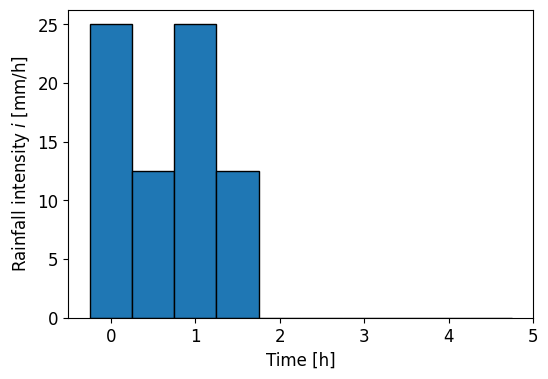

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

dt = 0.5
t = np.arange(0, 5.01, dt)
P = np.array([25,12.5,25,12.5,0,0,0,0,0,0])
plt.figure(figsize=(6,4))
plt.bar(t[:-1], P, width=0.5, edgecolor='black')
plt.xlabel('Time [h]')
plt.ylabel(r'Rainfall intensity $i$ [mm/h]');

::::::{dropdown} Answer&nbsp;{ref}`ex_storage_method`a

$Q_2$ is given by:

$$
Q_2=\frac{k-\frac{1}{2}\Delta t}{k+\frac{1}{2}\Delta t}Q_1+\frac{\Delta t}{k+\frac{1}{2}\Delta t}P_a \hspace{2.8cm} \text{[L/T]} 
$$

For $k=0.5$ h:

$$
Q_2 = \frac{0.5 - \frac{1}{2} \cdot 0.5}{0.5+\frac{1}{2}\cdot 0.5}Q_1+\frac{0.5}{0.5+\frac{1}{2}\cdot 0.5}P_a
$$

$$
Q_2 = \frac{1}{3}Q_1 + \frac{2}{3}P_a
$$

For $k=1$ h:

$$
Q_2 = \frac{1 - \frac{1}{2} \cdot 0.5}{1+\frac{1}{2}\cdot 0.5}Q_1+\frac{0.5}{1+\frac{1}{2}\cdot 0.5}P_a
$$

$$
Q_2 = 0.6Q_1 + 0.4P_a
$$

For $k=2$ h:

$$
Q_2 = \frac{2 - \frac{1}{2} \cdot 0.5}{2+\frac{1}{2}\cdot 0.5}Q_1+\frac{0.5}{2+\frac{1}{2}\cdot 0.5}P_a
$$

$$
Q_2 = 0.78Q_1 + 0.22P_a
$$

:::


:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`b
The results are computed in the Python code below:
:::

In [3]:
Pa = (1-0.2)*P # take into account the loss fraction
Qt05 = np.zeros(len(t))
Qtdt05 = np.zeros(len(t))
def Q_k05(Q, P):
    return 1/3*Q + 2/3*P

for i in range(len(t)-1):
    Qtdt05[i] = Q_k05(Qt05[i], Pa[i])
    Qt05[i+1] = Qtdt05[i]
    
print('Q_t: ', np.round(Qt05, 1))
print('Q_{t+dt}: ', np.round(Qtdt05, 1))


Q_t:  [ 0.  13.3 11.1 17.  12.3  4.1  1.4  0.5  0.2  0.1  0. ]
Q_{t+dt}:  [13.3 11.1 17.  12.3  4.1  1.4  0.5  0.2  0.1  0.   0. ]


:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`c
The results are computed in the Python code below:
:::

In [4]:
Qt1 = np.zeros(len(t))
Qtdt1 = np.zeros(len(t))

Qt2 = np.zeros(len(t))
Qtdt2 = np.zeros(len(t))

def Q_k1(Q, P):
    return 0.6*Q + 0.4*P

def Q_k2(Q, P):
    return 0.78*Q + 0.22*P

for i in range(len(t)-1):
    Qtdt1[i] = Q_k1(Qt1[i], Pa[i])
    Qt1[i+1] = Qtdt1[i]
    
print('k=1')
print('Q_t: ', np.round(Qt1, 1))
print('Q_{t+dt}: ', np.round(Qtdt1, 1))

for i in range(len(t)-1):
    Qtdt2[i] = Q_k2(Qt2[i], Pa[i])
    Qt2[i+1] = Qtdt2[i]
    
print('k=2')
print('Q_t: ', np.round(Qt2, 1))
print('Q_{t+dt}: ', np.round(Qtdt2, 1))


k=1
Q_t:  [ 0.   8.   8.8 13.3 12.   7.2  4.3  2.6  1.6  0.9  0.6]
Q_{t+dt}:  [ 8.   8.8 13.3 12.   7.2  4.3  2.6  1.6  0.9  0.6  0. ]
k=2
Q_t:  [0.  4.4 5.6 8.8 9.1 7.1 5.5 4.3 3.4 2.6 2. ]
Q_{t+dt}:  [4.4 5.6 8.8 9.1 7.1 5.5 4.3 3.4 2.6 2.  0. ]


:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`d

The figure below shows the variation of the storm runoff for different values of k; it is clear that the watershed responds more slowly as the lag time increases. Therefore, k can be assigned a physical meaning in this regard. It is also noticeable that the peaks due to the storm runoff occur exactly at the end of time intervals with high rainfall intensities; this is a result of neglecting the actual travel times within the watershed (since the runoff is assumed to be proportional to the storage).
:::


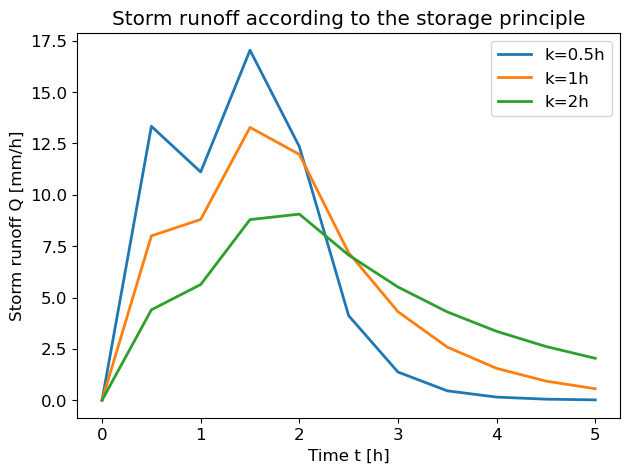

In [5]:
plt.figure(figsize=(7,5))
plt.plot(t, Qt05, label='k=0.5h')
plt.plot(t, Qt1, label='k=1h')
plt.plot(t, Qt2, label='k=2h')
plt.xlabel('Time t [h]')
plt.ylabel(r'Storm runoff Q [mm/h]')
plt.title('Storm runoff according to the storage principle')
plt.legend();

:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`e

The figure below shows the variation of the storm runoff for different types of rainfall losses.
:::

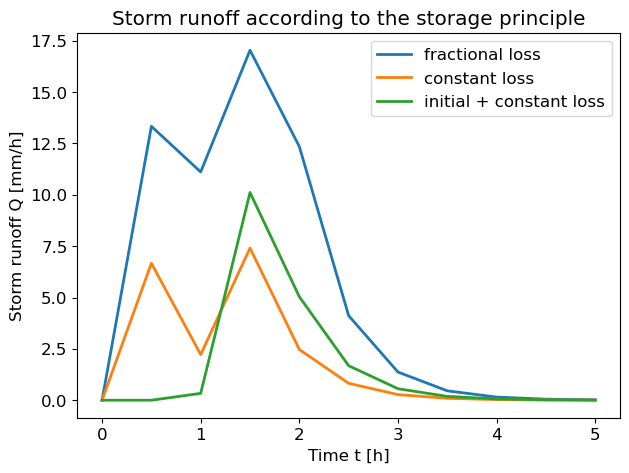

In [6]:
# constant loss of 15 mm/h
Pa = P - 15
Pa[Pa < 0] = 0

Qt_const = np.zeros(len(t))
Qtdt_const = np.zeros(len(t))
for i in range(len(t)-1):
    Qtdt_const[i] = Q_k05(Qt_const[i], Pa[i])
    Qt_const[i+1] = Qtdt_const[i]
    
# initial loss of 27 mm/h
Pa = P.copy()
Pa[0] -= 27
for i in range(len(Pa)):
    if Pa[i] < 0:
        Pa[i+1] -= abs(Pa[i])
        Pa[i] = 0
    else:
        break
# constant loss of 10 mm/h after initial loss
Pa = Pa - 10
Pa[Pa < 0] = 0

Qt_init = np.zeros(len(t))
Qtdt_init = np.zeros(len(t))
for i in range(len(t)-1):
    Qtdt_init[i] = Q_k05(Qt_init[i], Pa[i])
    Qt_init[i+1] = Qtdt_init[i]
     
    
plt.figure(figsize=(7,5))
plt.plot(t, Qt05, label='fractional loss')
plt.plot(t, Qt_const, label='constant loss')
plt.plot(t, Qt_init, label='initial + constant loss')
plt.xlabel('Time t [h]')
plt.ylabel(r'Storm runoff Q [mm/h]')
plt.title('Storm runoff according to the storage principle')
plt.legend();